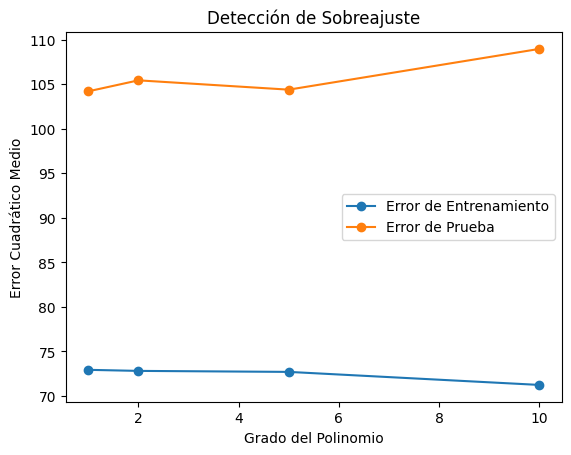

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generar un conjunto de datos sintético
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ajustar un modelo de regresión polinómica de alto grado
degrees = [1, 2, 5, 10]
train_errors, test_errors = [], []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualizar los errores
plt.plot(degrees, train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(degrees, test_errors, label='Error de Prueba', marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.title('Detección de Sobreajuste')
plt.legend()

plt.show()